In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
cust_book = pd.read_excel("C:/Users/KP/OneDrive/Desktop/Customer_Bookings.xlsx")
cust_book

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,1,0,1,5.62,0


In [3]:
cust_book.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [4]:
cust_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   wants_extra_baggage    50000 non-null  int64  
 8   wants_preferred_seat   50000 non-null  int64  
 9   wants_in_flight_meals  50000 non-null  int64  
 10  flight_duration        50000 non-null  float64
 11  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 4.6+ MB


In [50]:
pd.unique(cust_book['sales_channel'])
booking_source = cust_book['sales_channel'].value_counts()
booking_source

Internet    43880
Mobile       5363
Name: sales_channel, dtype: int64

In [33]:
pd.unique(cust_book['num_passengers'])
num_pass = cust_book['num_passengers'].value_counts()
num_pass

1    30848
2    12663
3     2882
4     1766
5      544
6      281
7      107
8       88
9       64
Name: num_passengers, dtype: int64

In [34]:
pd.unique(cust_book['flight_hour'])
hour = cust_book['flight_hour'].value_counts()
hour

8     3122
12    3114
9     3095
7     3077
11    3064
10    3047
13    3044
6     3005
5     2814
4     2785
14    2781
3     2613
2     2595
15    2201
1     2070
16    1536
0     1500
23     975
17     847
22     573
18     430
21     386
19     294
20     275
Name: flight_hour, dtype: int64

In [6]:
pd.unique(cust_book['trip_type'])
trip = cust_book['trip_type'].value_counts()
trip

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [7]:
pd.unique(cust_book['flight_day'])
dayof_travel = cust_book['flight_day'].value_counts()
dayof_travel

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [8]:
cust_book.duplicated().sum()

757

In [9]:
cust_book= cust_book.drop_duplicates(keep='first')
cust_book


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,1,0,1,5.62,0


In [10]:
cust_book.duplicated().sum()

0

In [11]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

cust_book["flight_day"] = cust_book["flight_day"].map(mapping)

In [12]:
cust_book.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49243.000000,49243.000000,49243.000000,49243.000000,49243.000000,49243.000000,49243.000000,49243.000000,49243.000000,49243.000000
mean,1.590460,84.744268,23.061694,9.071543,3.813517,0.668318,0.295758,0.426822,7.279929,0.150072
std,1.016754,90.420390,33.842297,5.414028,1.992067,0.470822,0.456387,0.494621,1.496374,0.357146
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [13]:
cust_book.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.214953,-0.115447,0.016353,0.014691,0.120605,0.029433,0.022117,-0.061896,0.023964
purchase_lead,0.214953,1.000000,-0.076824,0.035104,0.036388,-0.021629,-0.004543,-0.022699,0.068049,-0.022264
length_of_stay,-0.115447,-0.076824,1.000000,-0.025503,0.000778,0.177470,0.031116,0.098680,0.140427,-0.042154
flight_hour,0.016353,0.035104,-0.025503,1.000000,0.024273,-0.010903,0.012238,0.011878,-0.003175,0.006557
flight_day,0.014691,0.036388,0.000778,0.024273,1.000000,-0.002595,0.005695,0.007863,0.019289,-0.006962
wants_extra_baggage,0.120605,-0.021629,0.177470,-0.010903,-0.002595,1.000000,0.208262,0.216726,0.057689,0.068372
wants_preferred_seat,0.029433,-0.004543,0.031116,0.012238,0.005695,0.208262,1.000000,0.314935,0.100594,0.050129
wants_in_flight_meals,0.022117,-0.022699,0.098680,0.011878,0.007863,0.216726,0.314935,1.000000,0.156285,0.026186
flight_duration,-0.061896,0.068049,0.140427,-0.003175,0.019289,0.057689,0.100594,0.156285,1.000000,-0.106546
booking_complete,0.023964,-0.022264,-0.042154,0.006557,-0.006962,0.068372,0.050129,0.026186,-0.106546,1.000000


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

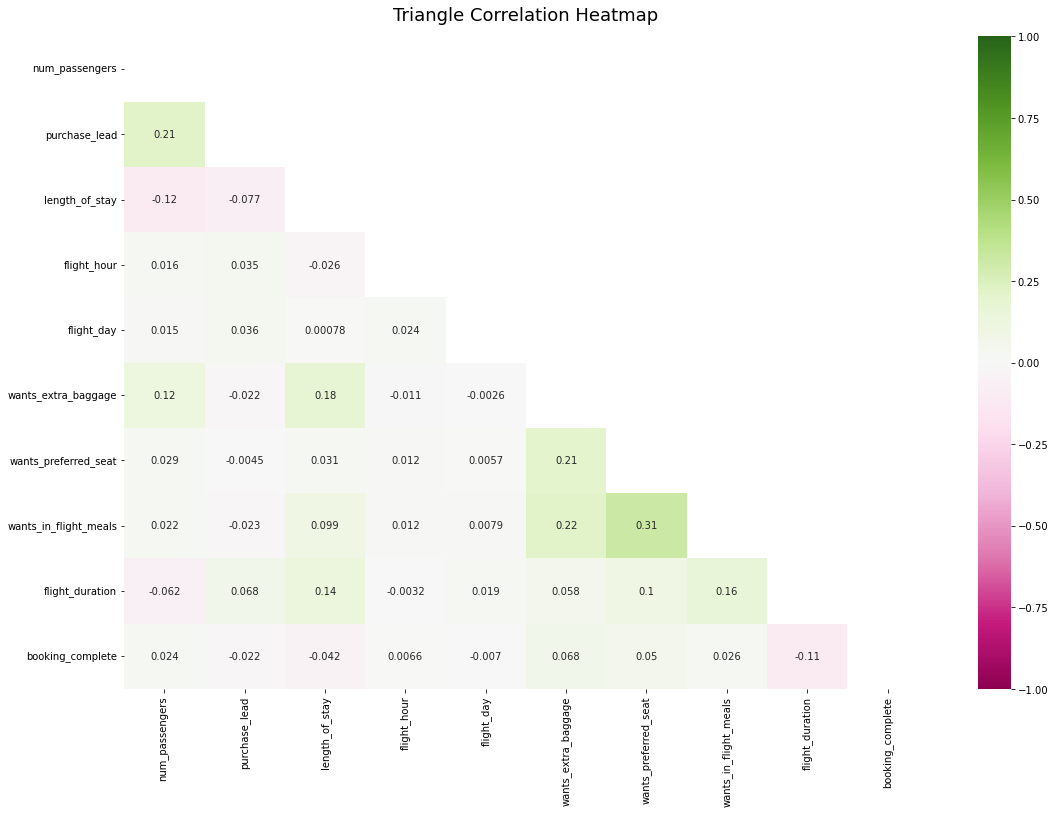

In [14]:
#We can investigate the correlation between the different variables. 
#The closer the value is to 1, the stronger the correlation between the two variables, but the closer the value is to -1, the stronger the negative correlation is.


plt.figure(figsize=(18, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(cust_book.corr(), dtype=np.bool))
heatmap = sns.heatmap(cust_book.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)


In [15]:
cust_book["booking_complete"].value_counts()


0    41853
1     7390
Name: booking_complete, dtype: int64

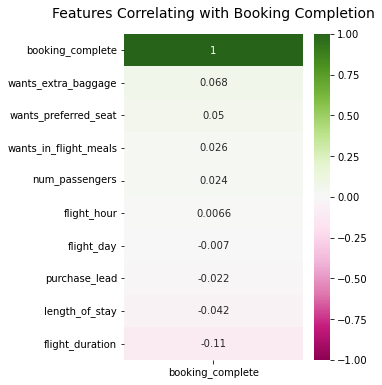

In [16]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(cust_book.corr()[['booking_complete']].sort_values(by='booking_complete', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('Features Correlating with Booking Completion', fontdict={'fontsize':14}, pad=16);


In [17]:
x = cust_book.drop(['booking_complete','sales_channel','trip_type'], axis=1)
y = cust_book['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True)


In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestClassifier(n_estimators=100, random_state=1)
forest_model.fit(x_train, y_train)
forest_model = RandomForestClassifier()
forest_model.fit(x_train, y_train)

rf_preds = forest_model.predict(x_test)
print('Accuracy for 10 random tress: ', forest_model.score(x_test, y_test))


Accuracy for 10 random tress:  0.843943547568281


In [21]:
forest_model = RandomForestClassifier(n_estimators=20)
forest_model.fit(x_train, y_train)
print('Accuracy for 20 random tress: ', forest_model.score(x_test, y_test))


Accuracy for 20 random tress:  0.8406944867499239


In [22]:
forest_model = RandomForestClassifier(n_estimators=5)
forest_model.fit(x_train, y_train)
print('Accuracy for 5 random tress: ', forest_model.score(x_test, y_test))


Accuracy for 5 random tress:  0.8195755914306021


In [23]:
forest_model = RandomForestClassifier()
forest_model.fit(x_train, y_train)
print(forest_model.score(x_test, y_test))

y_predicted = forest_model.predict(x_test)

cm = confusion_matrix(y_test, y_predicted)
cm


0.8434358818154127


array([[8248,  126],
       [1416,   59]], dtype=int64)

In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report

print('Accuracy: ', metrics.accuracy_score(y_test, y_predicted))
print('Recall: ', metrics.recall_score(y_test, y_predicted, zero_division=1))
print('Precision: ', metrics.precision_score(y_test, y_predicted, zero_division=1))
print(metrics.classification_report(y_test, y_predicted, zero_division=1))


Accuracy:  0.8434358818154127
Recall:  0.04
Precision:  0.31891891891891894
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      8374
           1       0.32      0.04      0.07      1475

    accuracy                           0.84      9849
   macro avg       0.59      0.51      0.49      9849
weighted avg       0.77      0.84      0.79      9849



In [25]:
importances = forest_model.feature_importances_
print("Feature Importances: ", importances)


Feature Importances:  [0.05949897 0.30272671 0.16234796 0.19188369 0.11598754 0.01260922
 0.016911   0.02266578 0.11536912]


In [26]:
importances_sorted = sorted(zip(importances, x), reverse=True)
print("Sorted Feature Importances:")
for importance, feature_name in importances_sorted:
    print(f"{feature_name}: {importance:.3f}")


Sorted Feature Importances:
purchase_lead: 0.303
flight_hour: 0.192
length_of_stay: 0.162
flight_day: 0.116
flight_duration: 0.115
num_passengers: 0.059
wants_in_flight_meals: 0.023
wants_preferred_seat: 0.017
wants_extra_baggage: 0.013


Text(0, 0.5, 'FEATURE NAMES')

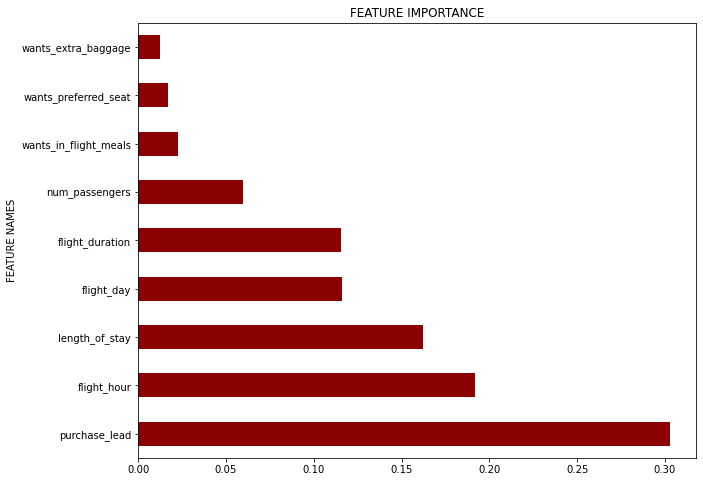

In [52]:
plt.figure(figsize=(10,8))
(pd.Series(forest_model.feature_importances_, index=x.columns)
   .nlargest(20)
   .plot(kind='barh', color='darkred')) 
plt.title('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
